# Practice using linear regression with pytorch

In [28]:
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import Variable

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [29]:
car_prices = np.linspace(3, 9, 7)
car_prices = car_prices.astype(np.float32)
car_prices = car_prices.reshape(-1, 1)
car_prices

array([[3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]], dtype=float32)

In [30]:
car_sell = np.array([7.5, 7, 6.5, 6, 5.5, 5.0, 4.5])
car_sell = car_sell.astype(np.float32)
car_sell = car_sell.reshape(-1,1)
car_sell

array([[7.5],
       [7. ],
       [6.5],
       [6. ],
       [5.5],
       [5. ],
       [4.5]], dtype=float32)

In [31]:
car_prices_tensor = Variable(torch.from_numpy(car_prices))
car_sell_tensor = Variable(torch.from_numpy(car_sell))

car_prices_tensor, car_sell_tensor

(tensor([[3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 tensor([[7.5000],
         [7.0000],
         [6.5000],
         [6.0000],
         [5.5000],
         [5.0000],
         [4.5000]]))

In [32]:
# create LinReg class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self,x):
        return self.linear(x)

input_dim = 1
output_dim = 1
# input and output size are 1
# define model
model = LinearRegression(input_dim, output_dim)

In [33]:
# mse our loss function
mse = nn.MSELoss()

# optimizer (find parameters that minimizes error)
learning_rate = 0.02 # how fast we reach best params
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #stoch grad desc

In [36]:
# train our model

loss_list = []
iterations = 1001
for iter in range(iterations):

    #optimization
    optimizer.zero_grad()

    # FP
    results = model(car_prices_tensor)

    # loss funciton
    loss = mse(results, car_sell_tensor)

    # BP
    loss.backward()

    # update parameters or weights
    optimizer.step()

    # store loss
    loss_list.append(loss.data)

    if(iter % 50 ==  0):
        print('epoch {}, loss {}'.format(iter, loss.data))

epoch 0, loss 9.02064323425293
epoch 50, loss 5.5140252113342285
epoch 100, loss 3.726057529449463
epoch 150, loss 2.517852544784546
epoch 200, loss 1.7014185190200806
epoch 250, loss 1.14971923828125
epoch 300, loss 0.7769138216972351
epoch 350, loss 0.5249937772750854
epoch 400, loss 0.35475948452949524
epoch 450, loss 0.23972579836845398
epoch 500, loss 0.16199277341365814
epoch 550, loss 0.10946550220251083
epoch 600, loss 0.0739709734916687
epoch 650, loss 0.04998552426695824
epoch 700, loss 0.03377746418118477
epoch 750, loss 0.022825157269835472
epoch 800, loss 0.015423761680722237
epoch 850, loss 0.010422435589134693
epoch 900, loss 0.007042969111353159
epoch 950, loss 0.004759255331009626
epoch 1000, loss 0.003216132987290621


* This loop runs 1001 times and we print out the loss in each epoch
* Also at end we know have our trained model and can use for prediction

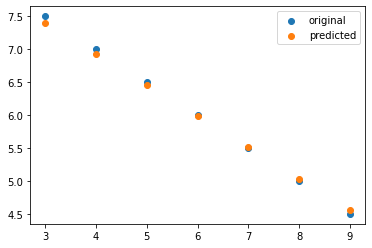

In [40]:
#predict car price
predicted = model(car_prices_tensor).data.numpy()

plt.scatter(car_prices, car_sell, label='original')

plt.scatter(car_prices, predicted, label='predicted')
plt.legend()